In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [34]:
f_root = TFile("Files/SelectionII_ccpi0_backgrounds_full.root") 
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC $\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['All','Cosmic','CC1pi0','CC0pi0','NC1pi0','NC0pi0','Other']
color_v = ['blue','purple','yellow','lime','green','lightskyblue','salmon'] 

In [3]:
def make2DHist(hist,xlabel,ylabel,var1,var2,mult='Mult = 1',nbins=100,\
               x00=0,x01=0,y00=0,y01=0,x10=0,x11=0,y10=0,y11=0):
   
    for n in xrange(0,len(name_v)):
    
        hist_name = hist + str(n)  
        h = f_root.Get(hist_name) 
   
        h_v, edges = rn.hist2array(h,return_edges=True)
         
        binsx = (edges[0][:-1] + edges[0][1:])/2
        binsy = (edges[1][:-1] + edges[1][1:])/2

        x, y = binsx, binsy
        display = np.zeros([len(y),len(x)])

        y_new = []; x_new = []
    
        for i in xrange(binsx.shape[0]):
            for j in xrange(binsy.shape[0]):
                k = h_v[i][j]
                while k > 0:
                    y_new.append(binsy[j])
                    x_new.append(binsx[i])
            
                    k -= 1
        
        x = np.linspace(0,9,9)
        
        H, xedges, yedges = np.histogram2d(y_new,x_new,bins=nbins)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

        fig = plt.figure(figsize=(8,6))
        plt.pcolormesh(yedges,xedges,Hmasked)
        plt.grid(True)
        plt.colorbar()
        plt.title("Track %s, %s"%(mult,name_v[n]),fontsize=20,weight='bold')
        plt.xlabel(xlabel,fontsize=16,weight='bold')
        plt.ylabel(ylabel,fontsize=16,weight='bold')
        if (x01 != 0):
            plt.plot((x00, x01), (y00, y01), '-',color='fuchsia',lw=4)
            plt.plot((x10, x11), (y10, y11), '-',color='fuchsia',lw=4)
        
        if ( var1 == 'mult2_dedx' ):
            plt.plot((2.5,4.0),(2.5,4.0),'-',color='fuchsia',lw=4)
        plt.savefig('Plots/CutJustify_sel2_%s_v_%s_%s.png' % (var1,var2,label_v[n]))

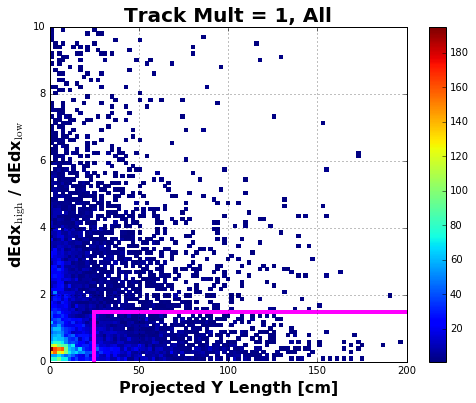

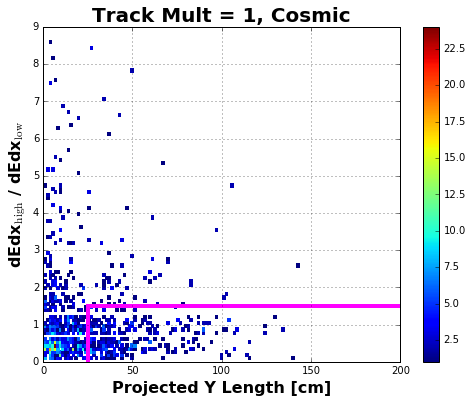

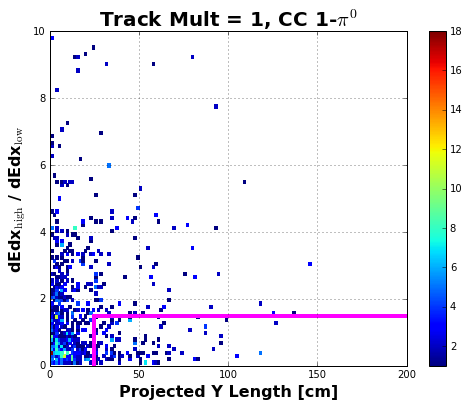

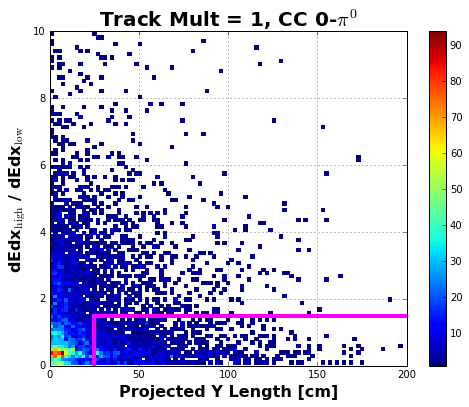

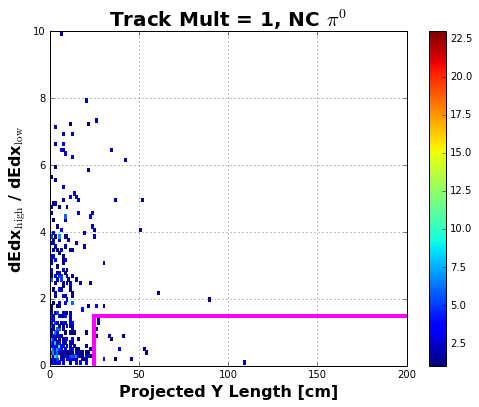

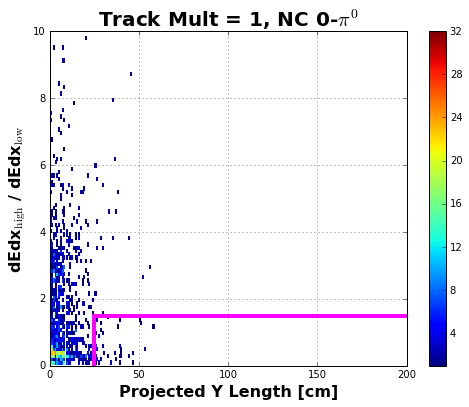

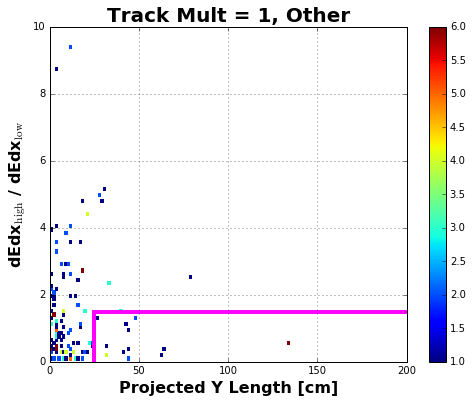

In [4]:
make2DHist("hSingleTrackLengthRatioVsdEdxRatio_2_",\
          "Projected Y Length [cm]", 'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$','mult1_dedxratio','projylen',\
          x00=25,x01=200,y00=1.5,y01=1.5,x10=25,x11=25,y10=0,y11=1.5)

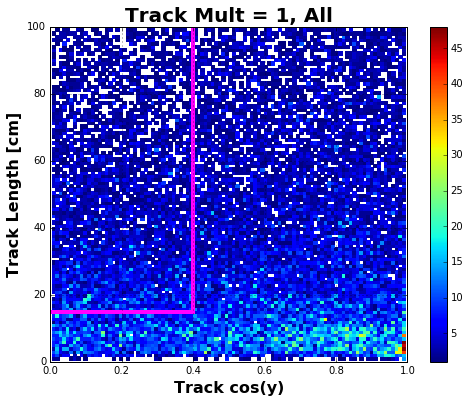

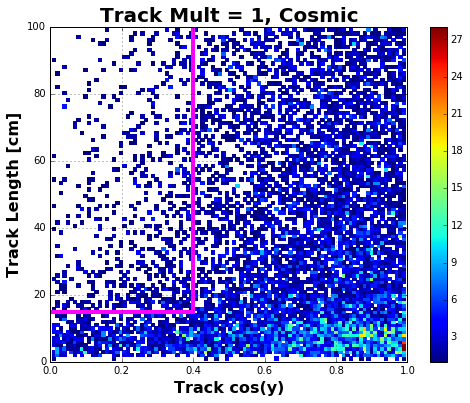

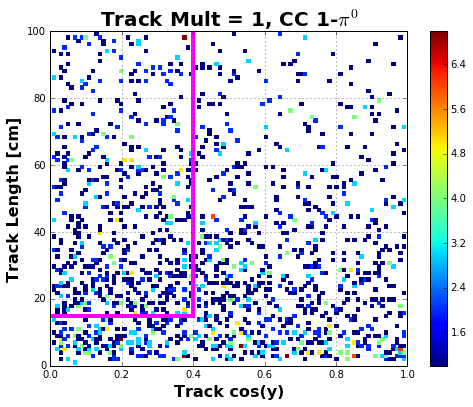

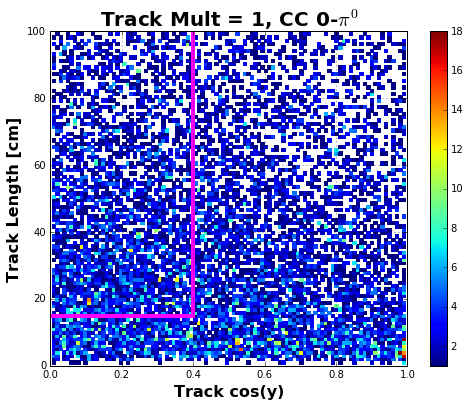

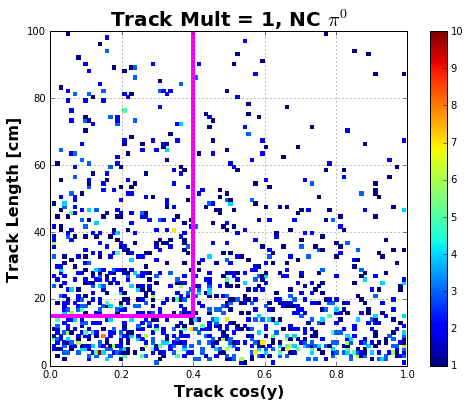

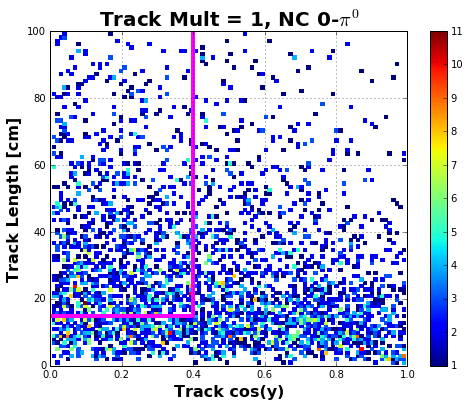

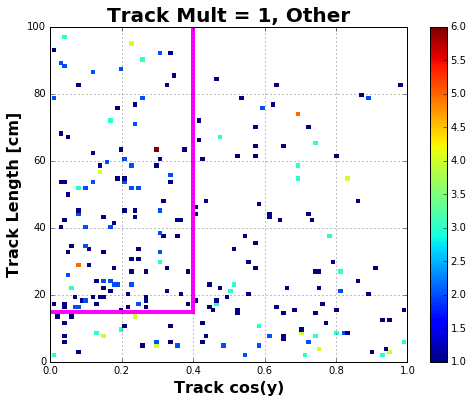

In [5]:
make2DHist("hCosVsLen_2_","Track cos(y)","Track Length [cm]",'mult1_length','cosy',\
          x00=0.4,x01=0.4,y00=15,y01=100,x10=0,x11=0.4,y10=15,y11=15)
# plt.plot((0.4, 0.4), (15,100),'-',color='fuchsia',lw=4,label='MCC8.2 Proposed')
# plt.plot((0,0.4), (15, 15),'-',color='fuchsia',lw=4)

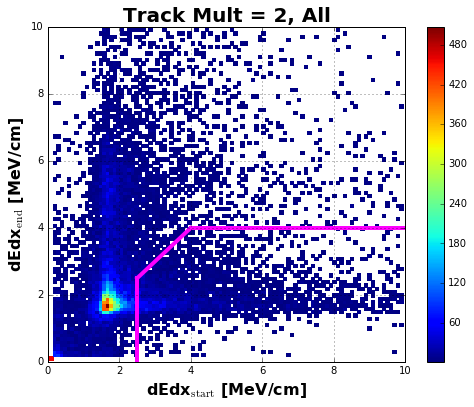

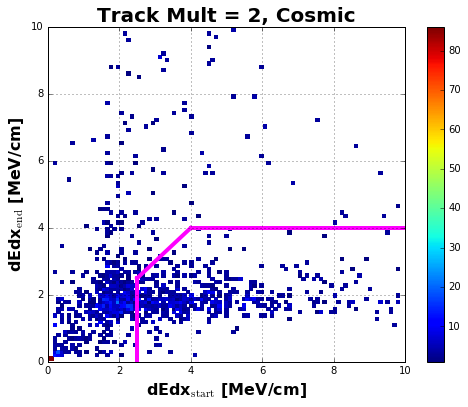

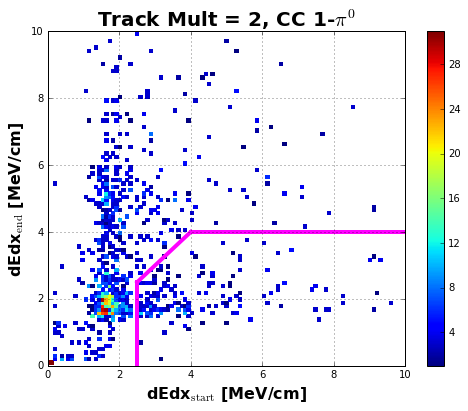

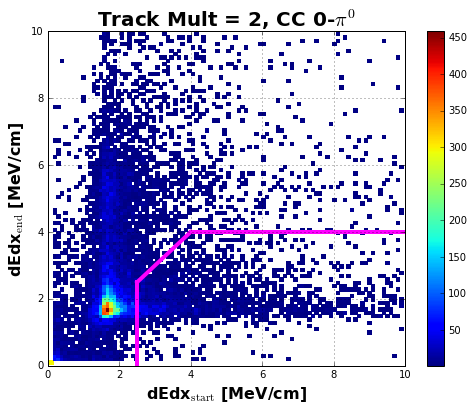

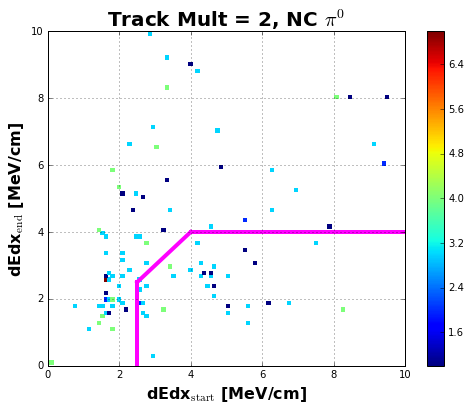

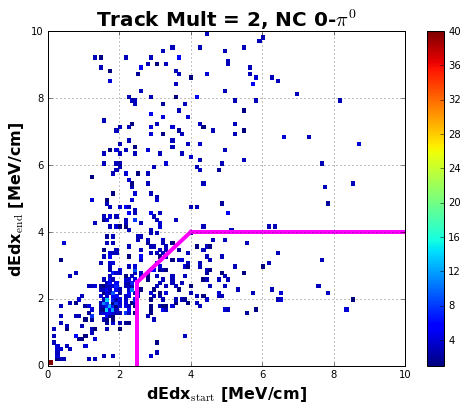

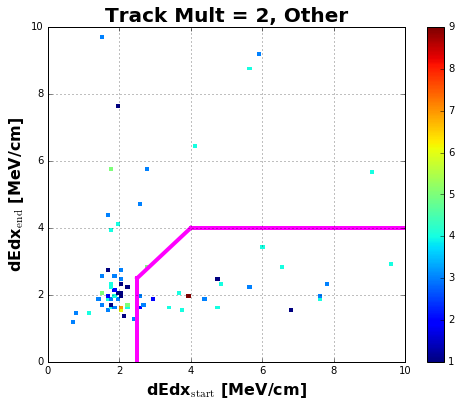

In [6]:
make2DHist("hLongTrackdEdxStartEnd_2_",\
          "dEdx$_\mathrm{start}$ [MeV/cm]","dEdx$_\mathrm{end}$ [MeV/cm]",'mult2_dedx','dedx',\
          "Mult = 2",x00=2.5,x01=2.5,y00=0,y01=2.5,x10=4,x11=10,y10=4,y11=4)


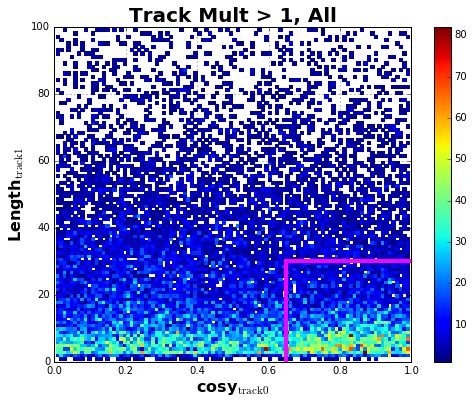

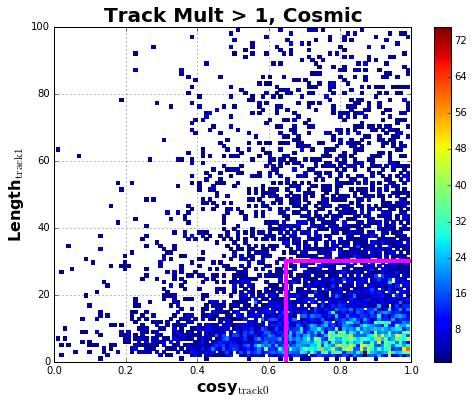

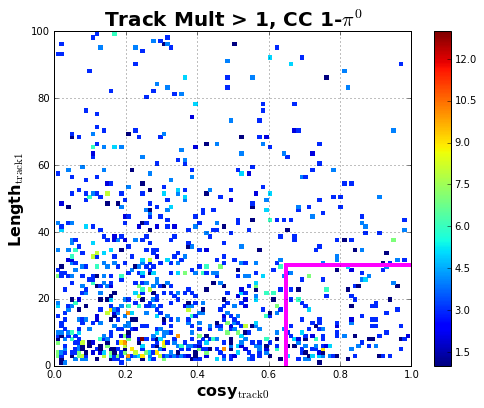

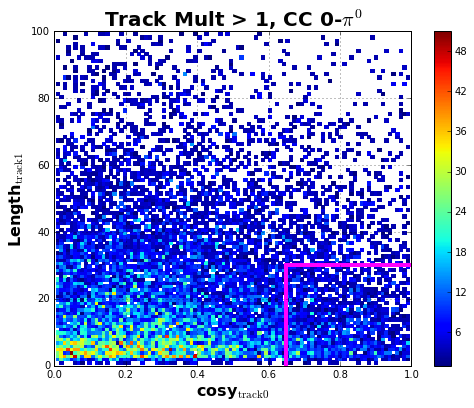

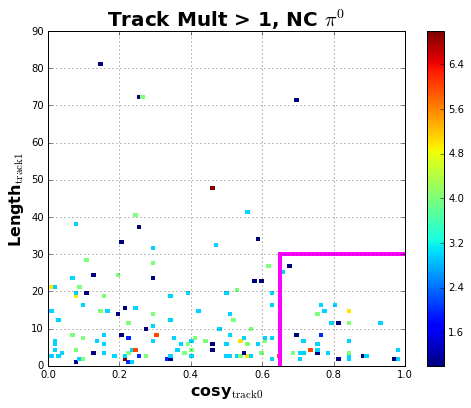

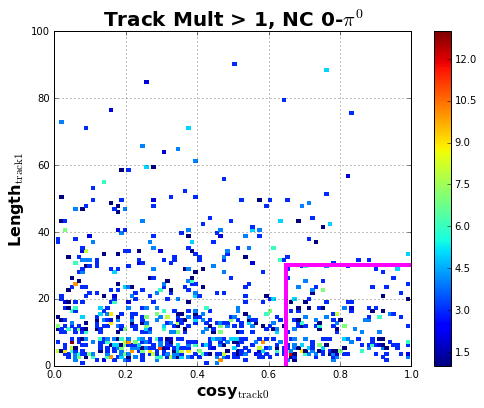

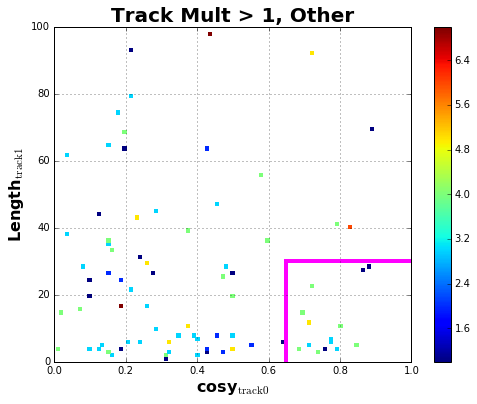

In [7]:
make2DHist("hCos0VsLen1_2_",\
          "cosy$_\mathrm{track0}$","Length$_\mathrm{track1}$",'multgt1_len','cosy',\
          'Mult > 1',x00=0.65,x01=0.65,y00=0,y01=30,x10=0.65,x11=1,y10=30,y11=30)



/Library/Python/2.7/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


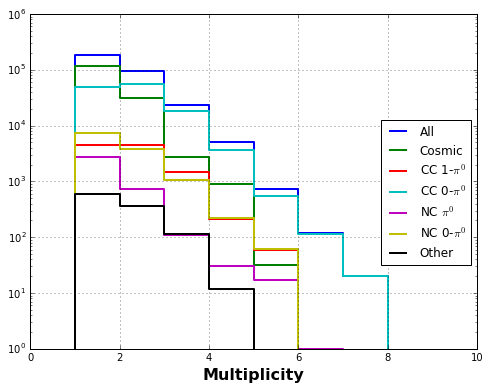

In [8]:
fig = plt.figure(figsize=(8,6))
for i in xrange(0,7):
    h = f_root.Get('hMul_2_%i'%i)
    h_v, edges = rn.hist2array(h,return_edges=True)
    left, right = edges[0][:-1], edges[0][1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([h_v,h_v]).T.flatten()
    plt.plot(X,Y,label=name_v[i],lw=2)

plt.grid(True)
plt.xlabel('Multiplicity',fontsize=16,weight='bold')
plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_mult.png')

plt.yscale('log')
plt.savefig('Plots/CutJustify_sel2_multlog.png')

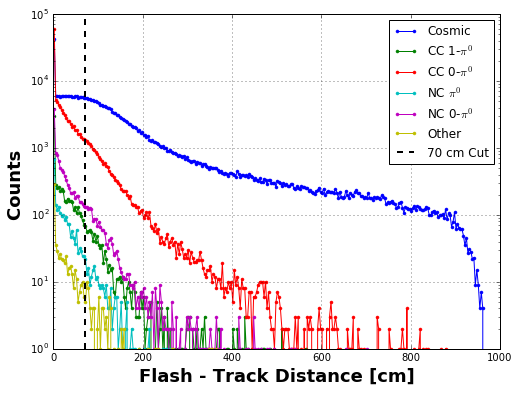

In [36]:
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hFlashTrackDist_2_%i"%i) 
    h_v = rn.hist2array(h)
    #plt.plot(h_v,label=name_v[i],marker='.')
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.')

    plt.grid(True)#,color='k',lw=3)
#plt.title("Largest Flash in Event by Neutrino Interaction",fontsize=20,weight='bold')
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Flash - Track Distance [cm]",fontsize=18,weight='bold')
plt.axvline(70,lw=2,color='k',ls='--',label='70 cm Cut')
plt.legend(loc=0)
plt.yscale('log')
plt.savefig('Plots/CutJustify_sel2_flashtrkdist.png')

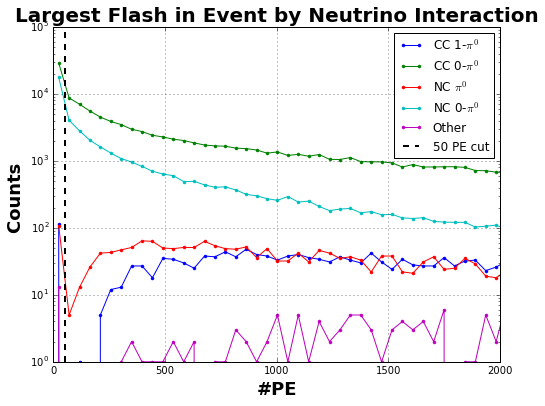

In [46]:
plt.figure(figsize=(8,6))

for i in xrange(2,len(label_v)):
    h = f_root.Get("hPEDist_2_%i"%i) 
    h_v = rn.hist2array(h)
    #plt.plot(h_v,label=name_v[i],marker='.')
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.')

    plt.grid(True)#,color='k',lw=3)
plt.title("Largest Flash in Event by Neutrino Interaction",fontsize=20,weight='bold')
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("#PE",fontsize=18,weight='bold')
plt.yscale('log')
plt.xlim(0,2000)
#plt.ylim(0,20000)
plt.axvline(50,lw=2,color='k',ls='--',label='50 PE cut')
plt.legend(loc=0)
plt.savefig('Plots/CutJustify_sel2_numPE.png')

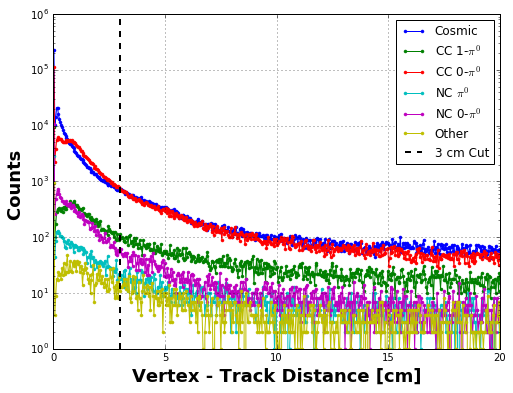

In [61]:
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hVtxTrackDist_2_%i"%i) 
    h_v = rn.hist2array(h)
    #plt.plot(h_v,label=name_v[i],marker='.')
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.')

    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Vertex - Track Distance [cm]",fontsize=18,weight='bold')
plt.axvline(3,lw=2,color='k',ls='--',label='3 cm Cut')
plt.legend(loc=0)
plt.xlim(0,20)
plt.yscale('log')
plt.savefig('Plots/CutJustify_sel2_vtxtrackdist.png')

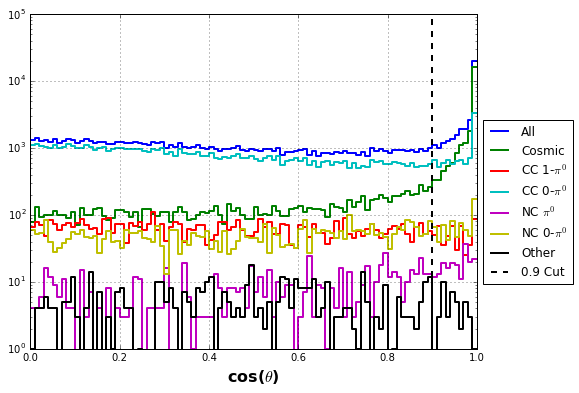

In [12]:
fig = plt.figure(figsize=(8,6))
for i in xrange(0,7):
    h = f_root.Get('hCos3_2_%i'%i)
    h_v, edges = rn.hist2array(h,return_edges=True)
    left, right = edges[0][:-1], edges[0][1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([h_v,h_v]).T.flatten()
    plt.plot(X,Y,label=name_v[i],lw=2)

plt.axvline(0.9,lw=2,ls='--',c='k',label='0.9 Cut')
plt.yscale('log')
plt.grid(True)
plt.xlabel('cos($\\theta$)',fontsize=16,weight='bold')
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_cosangle.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

## Now add data plots

In [5]:
f_root = TFile("Files/SelectionII_ccpi0_all_samples.root") 

stage='sel2_data'
name_v = ['OnBeam']
label_v = ['OnBeam']
color_v = ['black'] 

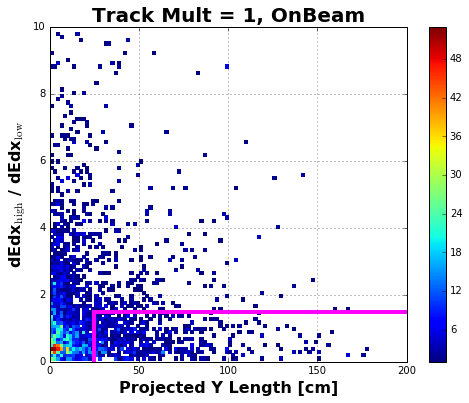

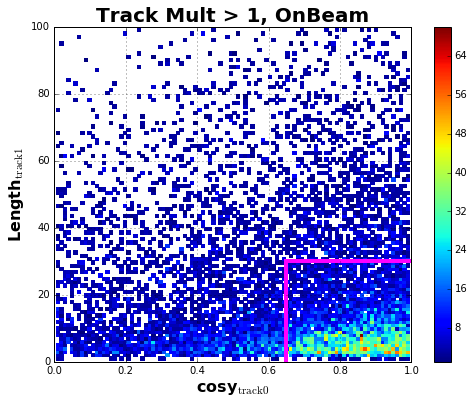

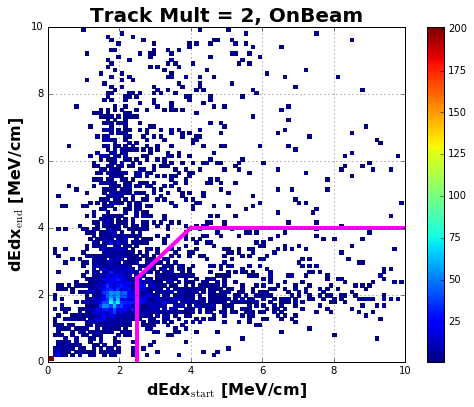

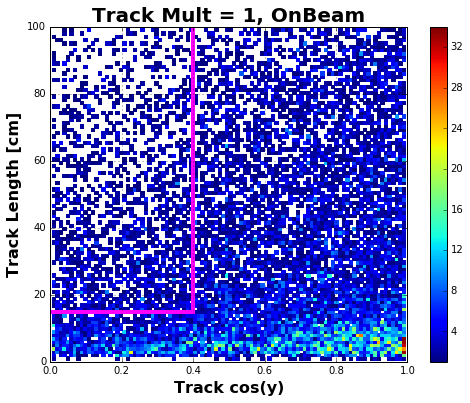

In [6]:
make2DHist("hSingleTrackLengthRatioVsdEdxRatio_0_",\
          "Projected Y Length [cm]", 'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$','mult1_dedxratio','projylen',\
          x00=25,x01=200,y00=1.5,y01=1.5,x10=25,x11=25,y10=0,y11=1.5)

make2DHist("hCos0VsLen1_0_",\
          "cosy$_\mathrm{track0}$","Length$_\mathrm{track1}$",'multgt1_len','cosy',\
          'Mult > 1',x00=0.65,x01=0.65,y00=0,y01=30,x10=0.65,x11=1,y10=30,y11=30)

make2DHist("hLongTrackdEdxStartEnd_0_",\
          "dEdx$_\mathrm{start}$ [MeV/cm]","dEdx$_\mathrm{end}$ [MeV/cm]",'mult2_dedx','dedx',\
          "Mult = 2",x00=2.5,x01=2.5,y00=0,y01=2.5,x10=4,x11=10,y10=4,y11=4)

make2DHist("hCosVsLen_0_","Track cos(y)","Track Length [cm]",'mult1_length','cosy',\
          x00=0.4,x01=0.4,y00=15,y01=100,x10=0,x11=0.4,y10=15,y11=15)


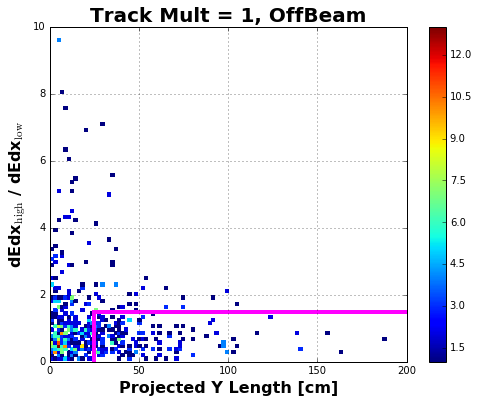

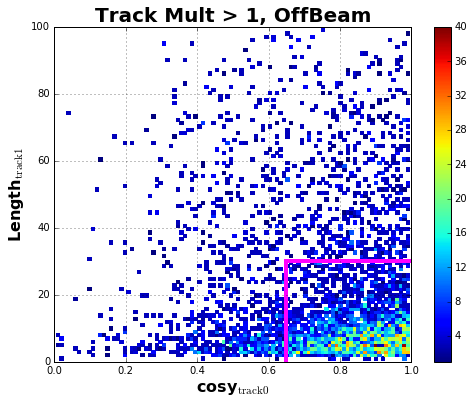

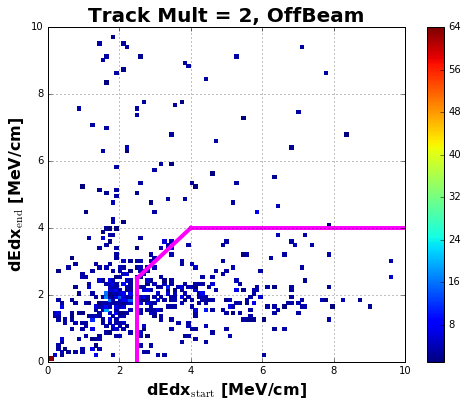

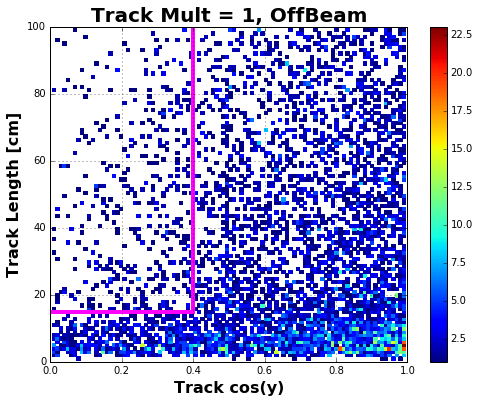

In [7]:
stage='sel2_data'
name_v = ['OffBeam']
label_v = ['OffBeam']
color_v = ['black'] 


make2DHist("hSingleTrackLengthRatioVsdEdxRatio_1_",\
          "Projected Y Length [cm]", 'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$','mult1_dedxratio','projylen',\
          x00=25,x01=200,y00=1.5,y01=1.5,x10=25,x11=25,y10=0,y11=1.5)

make2DHist("hCos0VsLen1_1_",\
          "cosy$_\mathrm{track0}$","Length$_\mathrm{track1}$",'multgt1_len','cosy',\
          'Mult > 1',x00=0.65,x01=0.65,y00=0,y01=30,x10=0.65,x11=1,y10=30,y11=30)

make2DHist("hLongTrackdEdxStartEnd_1_",\
          "dEdx$_\mathrm{start}$ [MeV/cm]","dEdx$_\mathrm{end}$ [MeV/cm]",'mult2_dedx','dedx',\
          "Mult = 2",x00=2.5,x01=2.5,y00=0,y01=2.5,x10=4,x11=10,y10=4,y11=4)

make2DHist("hCosVsLen_1_","Track cos(y)","Track Length [cm]",'mult1_length','cosy',\
          x00=0.4,x01=0.4,y00=15,y01=100,x10=0,x11=0.4,y10=15,y11=15)


# Now do Data-MC comparisons


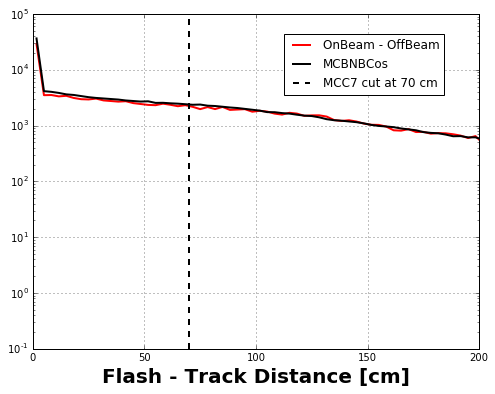

In [51]:
f_root = TFile("Files/SelectionII_ccpi0_all_samples.root") 

tot_on = 422452
tot_off = 367110 
tot_bnbcos = 147100 

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 567157 #547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)
mc_to_onbeam = dataPOT/mcbnbcos_POT

h0 = f_root.Get("hFlashTrackDist_0_0") # On Beam
h1 = f_root.Get("hFlashTrackDist_1_0") # Off Beam
h2 = f_root.Get("hFlashTrackDist_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on

cut = 70

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Flash - Track Distance [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.55,0.85))
plt.yscale('log')
plt.savefig('Plots/CutJustify_sel2_datamc_flashtrkdist.png')

plt.xlim(0,200)
plt.savefig('Plots/CutJustify_sel2_datamc_flashtrkdist_zoom.png')


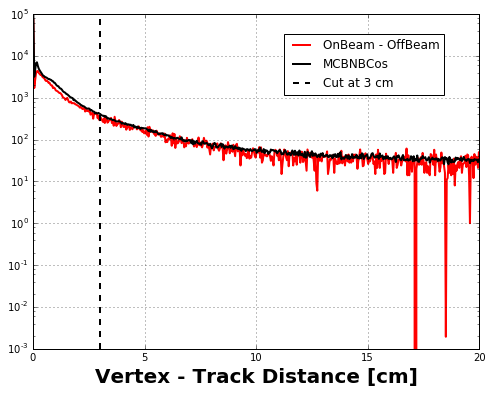

In [52]:
h0 = f_root.Get("hVtxTrackDist_0_0") # On Beam
h1 = f_root.Get("hVtxTrackDist_1_0") # Off Beam
h2 = f_root.Get("hVtxTrackDist_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on
    
cut = 3

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2)#,marker='.')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='Cut at %.0f cm'%cut)
plt.grid(True)
plt.xlim(0,20)
plt.xlabel('Vertex - Track Distance [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.55,0.85))
plt.yscale('log')
plt.savefig('Plots/CutJustify_sel2_datamc_vtxtrkdist.png')

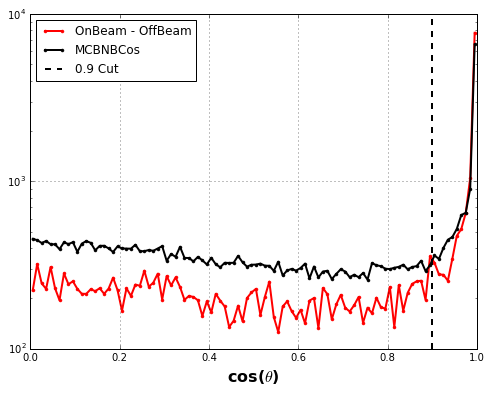

In [60]:
h0 = f_root.Get("hCos3_0_0") # On Beam
h1 = f_root.Get("hCos3_1_0") # Off Beam
h2 = f_root.Get("hCos3_2_0") # MC BNB

onbeam, edges = rn.hist2array(h0,return_edges=True)
offbeam = rn.hist2array(h1)
bnbcos = rn.hist2array(h2)
bins = (edges[0][:-1] + edges[0][1:])/2
bnbcos_sc    = bnbcos * mc_to_onbeam
on_minus_off = onbeam - offbeam * off_to_on
    
cut = 3

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2,marker='.')
plt.plot(bins,bnbcos_sc,'k-',label='MCBNBCos',lw=2,marker='.')
plt.axvline(0.9,lw=2,ls='--',c='k',label='0.9 Cut')
plt.grid(True)
plt.xlim(0,1)
plt.yscale('log')
plt.xlabel('Vertex - Track Distance [cm]',fontsize=20,weight='bold')
plt.xlabel('cos($\\theta$)',fontsize=16,weight='bold')
lgd = plt.legend(loc=0) #'upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_cosangle_OnBeam.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.xlim(0,200)
#plt.savefig('Plots/CutJustify_sel2_datamc_vtxtrkdist_zoom.png')